Notebook to implement population model gradient descent to learn parametesr such as p_sympt, p_severe, p_hosp

In [1]:
import datetime
import turicreate as tc
import matplotlib.pyplot as plt
covidestim_csv = 'covidestim.csv'
estimates = tc.SFrame(covidestim_csv)
print(estimates['state'].unique())
state_long = 'Texas'
state_short = 'TX' 

%load_ext autoreload
%autoreload 2
from PopulationData_ag import PopulationData
from HospitalData_v20210203 import HospitalData
# import random
import autograd

training_mid_dates = [20200901,  20201120] # start mid end, where forecasting happens from mid to end
# training_mid_dates = [20201010,  20201120] # start mid end, where forecasting happens from mid to end
forecast_duration = 80
training_end_dates = [int((datetime.datetime.strptime(str(d),'%Y%m%d') 
                       + datetime.timedelta(days = forecast_duration)).strftime('%Y%m%d')) for d in training_mid_dates]


# print(training_end_dates)
def make_forecastable_csv(date):
    pd_dummy = PopulationData(covidestim_csv, state_long,'20200711', date, forecast=False);
    pd_dummy.filtered_data.save(state_short+ '_forecast_after_' + str(date) + '.csv', format='csv') 

hd_truthful = HospitalData('CT_HHS_data.csv', state_short,'20200711','20210305')
pd_truthful = PopulationData(covidestim_csv, state_long,'20200711', '20210305', forecast=False);
# pd_truthful.filtered_data['date'].unique().sort()[-10:-1]

for d in training_mid_dates:
    make_forecastable_csv(d)

pd_list = []
for i,(m,e) in enumerate(zip(training_mid_dates,training_end_dates)):
    pd_list += [PopulationData(state_short+ '_forecast_after_'+str(m) + '.csv',state_long,'20200711',str(e), training_mode=True, debug_mode=True)]



pd_list_train = pd_list[0:-1]
pd_list_val = pd_list[-1:]

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.663232 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.509997 secs.

['Missouri', 'District of Columbia', 'Oregon', 'New Hampshire', 'Florida', 'Georgia', 'Mississippi', 'Kansas', 'South Dakota', 'Delaware', 'Hawaii', 'Rhode Island', 'Wisconsin', 'Tennessee', 'New Jersey', 'Utah', 'Colorado', 'New Mexico', 'New York', 'Puerto Rico', 'Louisiana', 'Michigan', 'Vermont', 'Arkansas', 'Nebraska', 'Oklahoma', 'West Virginia', 'Maine', 'Alaska', 'Nevada', 'North Carolina', 'California', 'Indiana', 'Ohio', 'Texas', 'Idaho', 'Washington', 'Arizona', 'Minnesota', 'Iowa', 'Illinois', 'Kentucky', 'South Carolina', 'Montana', 'Massachusetts', 'Virginia', 'Pennsylvania', 'Wyoming', 'Connecticut', 'Alabama', 'Maryland', 'North Dakota']


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CT_HHS_data.csv

Parsing completed. Parsed 100 lines in 0.13889 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,int,str,int,str,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CT_HHS_data.csv

Parsing completed. Parsed 21004 lines in 0.082862 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.748428 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.688326 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.947221 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.818661 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.448946 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.761934 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/TX_forecast_after_20200901.csv

Parsing completed. Parsed 53 lines in 0.14228 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/TX_forecast_after_20200901.csv

Parsing completed. Parsed 53 lines in 0.057361 secs.

Read 100 lines. Lines per second: 134.076

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.747487 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.910552 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/TX_forecast_after_20201120.csv

Parsing completed. Parsed 100 lines in 0.16139 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/TX_forecast_after_20201120.csv

Parsing completed. Parsed 133 lines in 0.032121 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.902017 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.775987 secs.

In [2]:
hd_truthful.filtered_data

previous_day_admission_adult_covid_confirmed ...,total_adult_patients_hospitalized_confirmed_covid ...,staffed_icu_adult_patients_confirmed_covid ...,previous_day_admission_adult_covid_confirmed_c ...,total_adult_patients_hospitalized_confirmed_co ...
None,None,None,0,0
None,None,None,0,0
None,None,None,0,0
None,None,None,0,0
814,6258,1789,211,221
954,7095,1884,252,273
970,7211,2000,270,289
810,7246,2100,268,295
732,7456,2133,271,304
729,7554,2078,281,312


6780.0573954587135 loss at iteration  0 *** gradients_cummsum =  0.016010530524422025


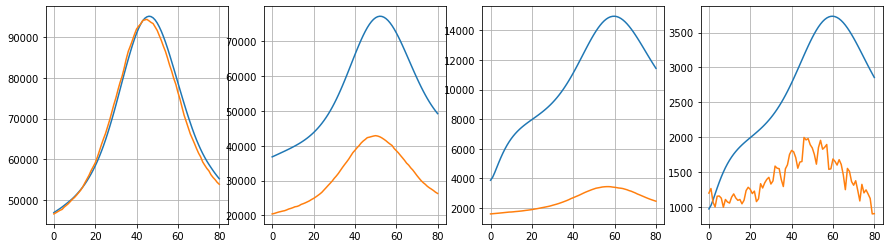

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.82, 'prob_severe': 0.2, 'prob_hosp': 0.25, 'prob_soujourn_inf_alpha': 3.41, 'prob_soujourn_inf_beta': 0.605, 'prob_soujourn_symp_alpha': 1.62, 'prob_soujourn_symp_beta': 0.218} 

5056.942122538278 loss at iteration  1 *** gradients_cummsum =  0.013262023088638799
3863.9387528943926 loss at iteration  2 *** gradients_cummsum =  0.01094085599409313
3045.112519599621 loss at iteration  3 *** gradients_cummsum =  0.008990569836143571
2487.6930997971085 loss at iteration  4 *** gradients_cummsum =  0.007360393164948013
2111.0799514038067 loss at iteration  5 *** gradients_cummsum =  0.006004668405652274


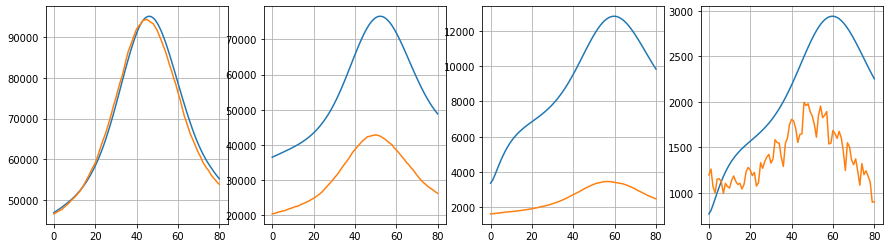

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8139039249214963, 'prob_severe': 0.17329150594072043, 'prob_hosp': 0.22906784417500345, 'prob_soujourn_inf_alpha': 3.410078527746053, 'prob_soujourn_inf_beta': 0.6045557852476192, 'prob_soujourn_symp_alpha': 1.6202681249546276, 'prob_soujourn_symp_beta': 0.2159632198075955} 

1858.3511453058368 loss at iteration  6 *** gradients_cummsum =  0.004882559261881987
1689.7732610494097 loss at iteration  7 *** gradients_cummsum =  0.003957865394970654
1577.9135193698996 loss at iteration  8 *** gradients_cummsum =  0.0031988368818793847
1504.0206307791013 loss at iteration  9 *** gradients_cummsum =  0.0025872251781155356
1455.3916085118547 loss at iteration  10 *** gradients_cummsum =  0.002092219992430264


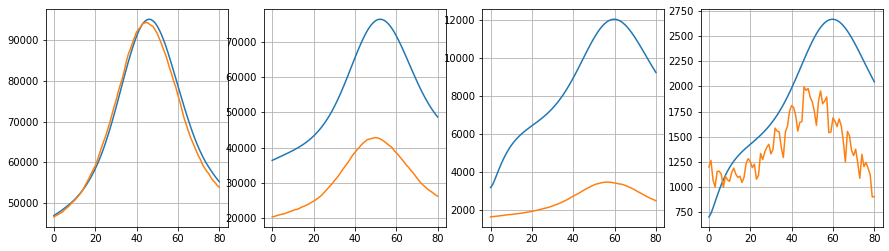

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8118443841777391, 'prob_severe': 0.16309490926962117, 'prob_hosp': 0.22143227065095786, 'prob_soujourn_inf_alpha': 3.4100873116356687, 'prob_soujourn_inf_beta': 0.6044979961341083, 'prob_soujourn_symp_alpha': 1.6203333383862406, 'prob_soujourn_symp_beta': 0.21536485044006357} 

1423.488071565761 loss at iteration  11 *** gradients_cummsum =  0.0016894345138682117
1402.6095775670697 loss at iteration  12 *** gradients_cummsum =  0.0013649397832766435
1388.972212107995 loss at iteration  13 *** gradients_cummsum =  0.0011025743762371003
1380.076391851401 loss at iteration  14 *** gradients_cummsum =  0.0008902563065468895
1374.2776144497082 loss at iteration  15 *** gradients_cummsum =  0.0007306951021118467


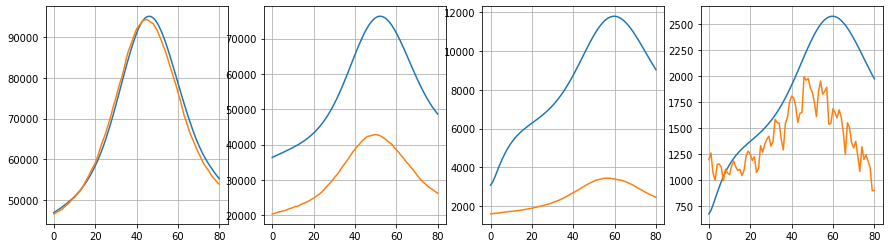

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8111761897950338, 'prob_severe': 0.1594766836121795, 'prob_hosp': 0.21877789874866826, 'prob_soujourn_inf_alpha': 3.410072247053074, 'prob_soujourn_inf_beta': 0.6045723930042239, 'prob_soujourn_symp_alpha': 1.6203286325036115, 'prob_soujourn_symp_beta': 0.21526606558804903} 

1370.4975741197038 loss at iteration  16 *** gradients_cummsum =  0.0006021077661776059
1368.0311793384687 loss at iteration  17 *** gradients_cummsum =  0.0004983509349620795
1366.4184274547238 loss at iteration  18 *** gradients_cummsum =  0.00041469062638477527
1365.3597708286914 loss at iteration  19 *** gradients_cummsum =  0.0003472740974364846
1364.6604445529445 loss at iteration  20 *** gradients_cummsum =  0.00029297321599519073


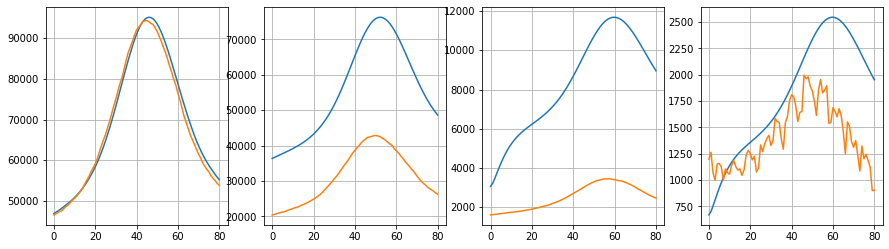

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8109804711348653, 'prob_severe': 0.15822914505056448, 'prob_hosp': 0.21786973678716642, 'prob_soujourn_inf_alpha': 3.4100491143845586, 'prob_soujourn_inf_beta': 0.6046914879648527, 'prob_soujourn_symp_alpha': 1.6203002100511954, 'prob_soujourn_symp_beta': 0.21533711485027587} 

1364.193970072081 loss at iteration  21 *** gradients_cummsum =  0.00024925306555581914
1363.8782962909834 loss at iteration  22 *** gradients_cummsum =  0.0002140626575267012
1363.660237554486 loss at iteration  23 *** gradients_cummsum =  0.00018574464831630377
1363.505341958943 loss at iteration  24 *** gradients_cummsum =  0.00016296116025662623
1363.3913049421792 loss at iteration  25 *** gradients_cummsum =  0.00014625203644769144


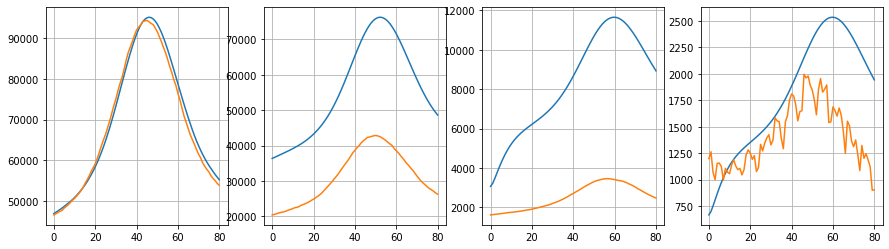

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8109439339709664, 'prob_severe': 0.15779809271192188, 'prob_hosp': 0.2175567510724897, 'prob_soujourn_inf_alpha': 3.410023274840227, 'prob_soujourn_inf_beta': 0.604825554263813, 'prob_soujourn_symp_alpha': 1.6202638185057698, 'prob_soujourn_symp_beta': 0.21546523699199083} 

1363.3036927727094 loss at iteration  26 *** gradients_cummsum =  0.0001346342247957135
1363.2331685662086 loss at iteration  27 *** gradients_cummsum =  0.00012528698586276396
1363.1736943577666 loss at iteration  28 *** gradients_cummsum =  0.00011776656994840582
1363.1213665475664 loss at iteration  29 *** gradients_cummsum =  0.000111715666351975
1363.073661992374 loss at iteration  30 *** gradients_cummsum =  0.00010684666525709995


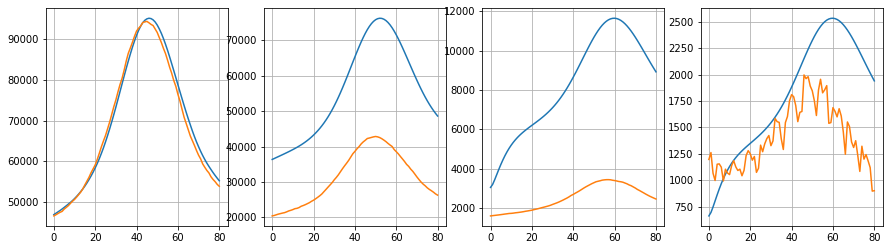

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8109608219088791, 'prob_severe': 0.15764347290275385, 'prob_hosp': 0.21744453199548106, 'prob_soujourn_inf_alpha': 3.4099965358467386, 'prob_soujourn_inf_beta': 0.604964571222737, 'prob_soujourn_symp_alpha': 1.6202247708749378, 'prob_soujourn_symp_beta': 0.21561236206806408} 

1363.028950150269 loss at iteration  31 *** gradients_cummsum =  0.00010292812586553454
1362.9861774999488 loss at iteration  32 *** gradients_cummsum =  9.977384895951454e-05


In [3]:
def get_truthdict_given_mid_end(mid_date,end_date):
#     print(mid_date,end_date, 'mid date end date')
    pd_truthful.start_date = mid_date
    pd_truthful.end_date = end_date
    hd_truthful.start_date = mid_date
    hd_truthful.end_date = end_date
    truthdict = {
    'date':pd_truthful.filtered_data['date'],
    'infections':pd_truthful.filtered_data['infections'],
    'symptomatic':pd_truthful.filtered_data['symptomatic'],
    'severe':pd_truthful.filtered_data['severe'],
    'hosp':hd_truthful.filtered_data['previous_day_admission_adult_covid_confirmed'],
    }

    return truthdict


def add_to_dict(d,g):
    for k in d.keys():
        d[k]=d[k]+g[k]
    return d

def scale_dict_vals(d,s):
    for k in d.keys():
        d[k] = s*d[k]
    return d

def cumsum_dict_vals(d,s):
    cumsum= 0
    for k in d.keys():
        cumsum+=abs(s*d[k])
    return cumsum

import numpy as np
import numpy.random as random
def gradient_descent(pd_list_train, init_params, n_iters=2, step_size=0.001, n_steps_between_print=5, lambda_reg = 1, epsilon_stop=5e-10):
    batch_loss_per_iteration = []
    val_loss_per_iteration = []
    for n in range(n_iters):
        
        batch_loss = 0
        for pd in pd_list_train:
            pd.loss_per_iteration += [0]
        
        #         pd_batch = random.choice(pd_list_train,replace=False, size=3)
        pd_batch = random.choice(pd_list_train,replace=False, size=1)
        if n == 0:
            new_params = init_params
        else:
            new_params = add_to_dict(new_params, scale_dict_vals(grads, -1*step_size))
        
        
        for i,pd in enumerate(pd_batch):
            pd.training_mode=True
            new_grad = pd.get_grad_of_loss(new_params,get_truthdict_given_mid_end(pd.filtered_data['date'][-1], pd.end_date) ,lambda_reg= lambda_reg)
            batch_loss += pd.loss_per_iteration[-1] # pd.loss_per_iteration[-1] is set to loss within get_grad_of_loss call
            if i == 0:
                grads = new_grad
            else:
                grads = add_to_dict(grads, new_grad)
        
        grads = scale_dict_vals(grads, 1/len(pd_batch))
        batch_loss_per_iteration += [batch_loss/len(pd_batch)]
        print(batch_loss/len(pd_batch), 'loss at iteration ', n, '*** gradients_cummsum = ', cumsum_dict_vals(grads, step_size))
#         print(cumsum_dict_vals(grads,1), 'cumsum for ', grads)
        
#         pd_list_val = pd_batch # DEBUG PURPOSES
        
        val_loss_per_iteration += [np.nan]
        if n%n_steps_between_print == 0:
            val_loss = 0              
            for pd in pd_list_val:
                fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4,figsize=(15,4))    
                pd.training_mode=False
                fc_data = pd.get_forecasted_data(new_params) 
                pd.training_mode=True
                truth_data = get_truthdict_given_mid_end(pd.filtered_data['date'][-1],pd.end_date)
                
                ax1.plot(fc_data['infections'])
                ax2.plot(fc_data['symptomatic'])
                ax3.plot(fc_data['severe'])
                ax4.plot(fc_data['hosp'])

                ax1.plot(truth_data['infections'])
                ax2.plot(truth_data['symptomatic'])
                ax3.plot(truth_data['severe'])
                ax4.plot(truth_data['hosp'])
                for i in range(1,5,1):
                    eval('ax' + str(i) + '.grid()') 
                plt.show()
                print('new_params = ',new_params,'\n')
                loss = 0
                for i,k in enumerate(['symptomatic', 'severe','hosp']):
                    val_loss+=np.sum(np.abs(np.array(fc_data[k]) - np.array(truth_data[k]))*np.linspace(0.1, 1, num=len(fc_data[k])) )*(i+1)
            val_loss_per_iteration[-1] = val_loss/len(pd_list_val)
        
        if cumsum_dict_vals(grads, step_size)<epsilon_stop:
            return new_params, batch_loss_per_iteration, val_loss_per_iteration
    return new_params, batch_loss_per_iteration, val_loss_per_iteration

train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
new_params, batch_loss_per_iteration, val_loss_per_iteration = gradient_descent(
    pd_list_train, train_params, n_iters=100, step_size=5e-8, n_steps_between_print=5, lambda_reg=1,epsilon_stop=1e-4)



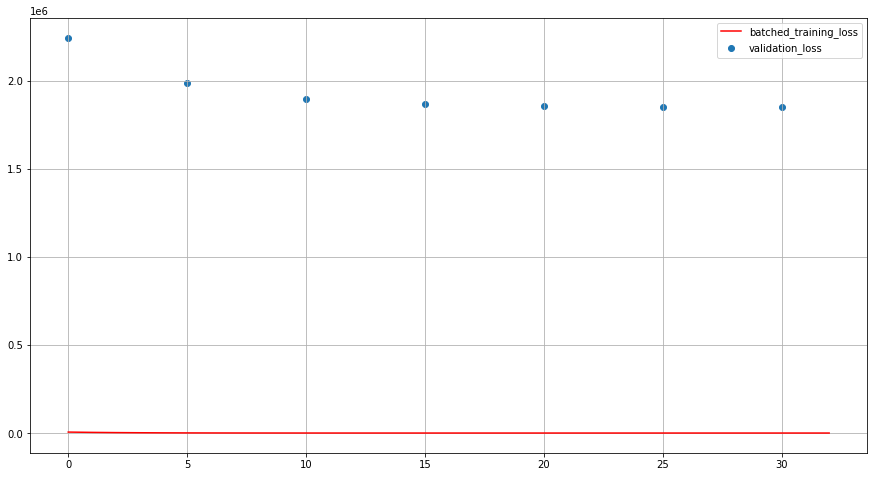

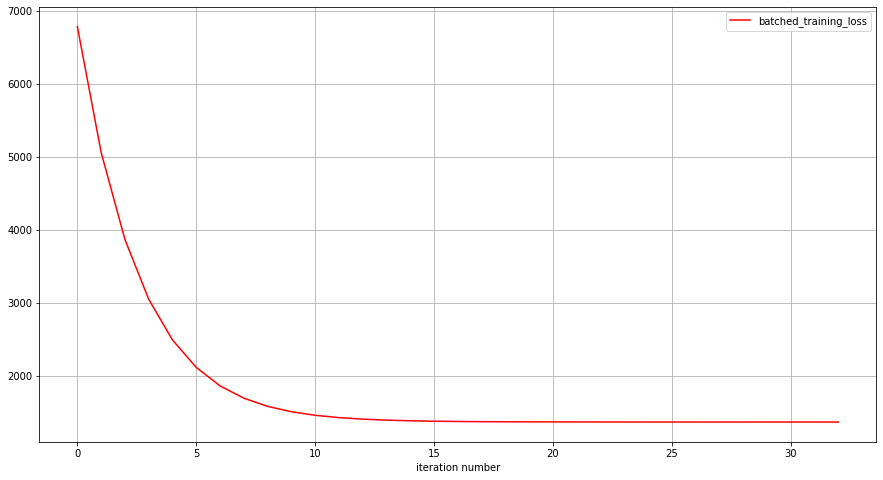

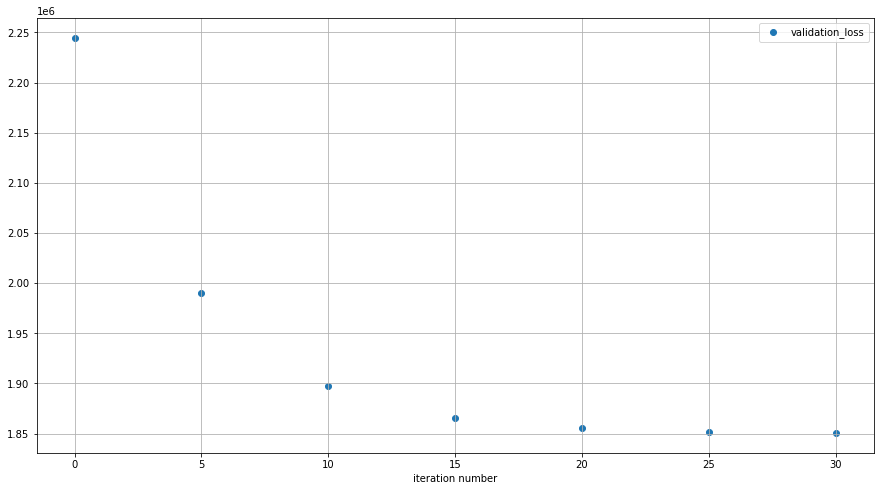

In [4]:
fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
# plt.show()

plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

fig = plt.figure(figsize=(15,8))
plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

# print(val_loss_per_iteration)
# import numpy as np
# np.linspace(1, 10, num=10) * np.array(np.linspace(0.1, 1, num=10))


{'T_serial': 5.8, 'prob_sympt': 0.82, 'prob_severe': 0.2, 'prob_hosp': 0.25, 'prob_soujourn_inf_alpha': 3.41, 'prob_soujourn_inf_beta': 0.605, 'prob_soujourn_symp_alpha': 1.62, 'prob_soujourn_symp_beta': 0.218}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-5-e205c186d35b>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


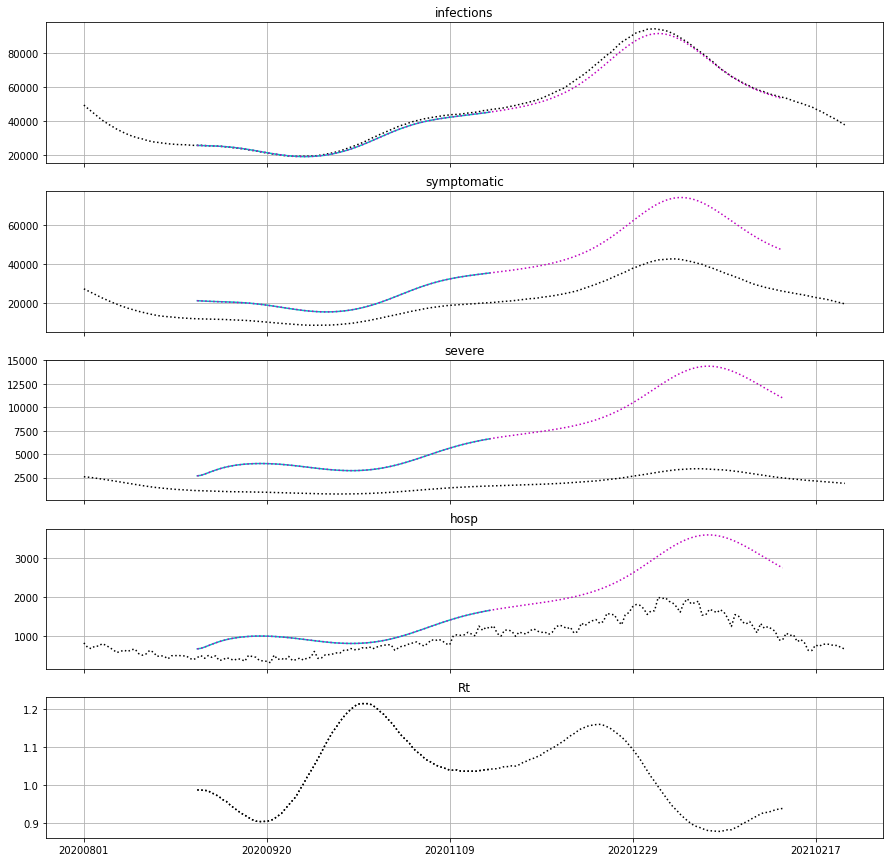

{'T_serial': 5.8, 'prob_sympt': 0.8109735333818263, 'prob_severe': 0.15761260299403437, 'prob_hosp': 0.2174221158811833, 'prob_soujourn_inf_alpha': 3.4099857421879114, 'prob_soujourn_inf_beta': 0.6050207117393649, 'prob_soujourn_symp_alpha': 1.6202088601552993, 'prob_soujourn_symp_beta': 0.21567329446812863}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-5-e205c186d35b>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


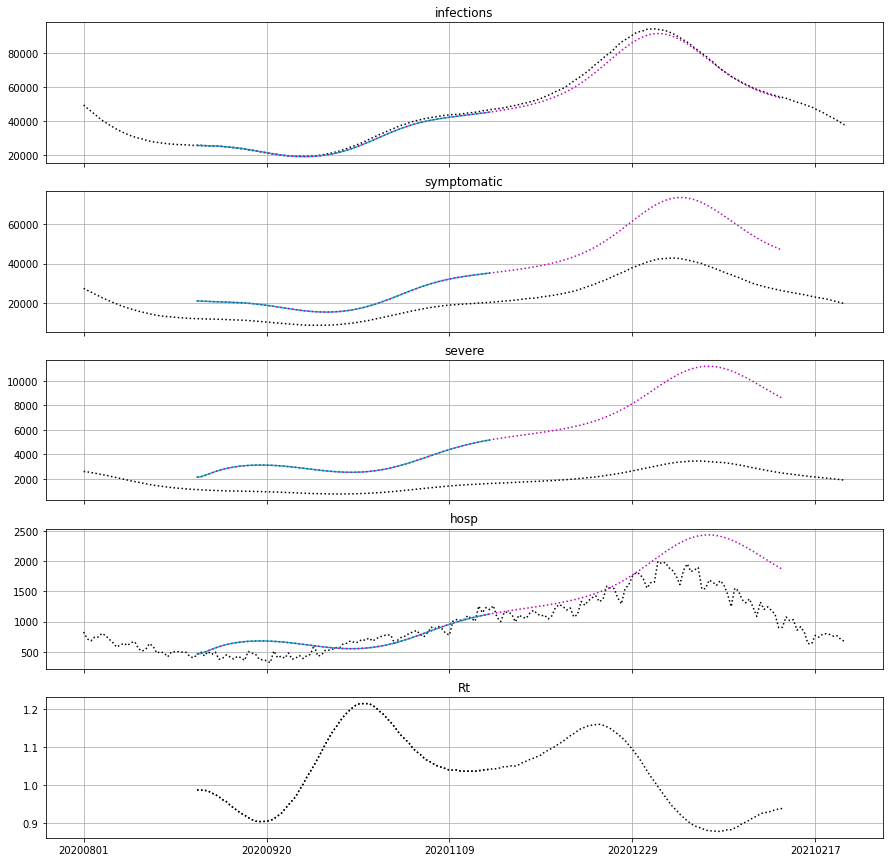

In [5]:
def plot_performance(new_params):
    color_list = ['k','k','k','k','k']
    fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=5, ncols=1,figsize=(15,15), sharex=True)   
    truth_data = get_truthdict_given_mid_end('20200801', '20210225')
    print(pd_truthful.start_date, ' to ', pd_truthful.end_date)
    print('cyan = forecasts after being trained on that interval')
    print('violet = forecasts on validation/unseen interval')


    for i,(p,c) in enumerate(zip(['infections', 'symptomatic', 'severe','hosp','Rt'],color_list)):
        if p != 'Rt':
            eval('ax'+str(i+1) + ".plot( truth_data[p], color = c,ls=':' )")
                            
        for pd in pd_list_train:
            pd.training_mode = False
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            if p != 'Rt':
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'c',ls = '-' )")
            else:
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'k',ls = ':' )")

        #         for pd in pd_list_val:
        for pd in pd_list_train:
            pd.training_mode = False
            end_date_original = pd.end_date
            pd.end_date = str((datetime.datetime.strptime(str(end_date_original),'%Y%m%d') + datetime.timedelta(days = forecast_duration)).strftime('%Y%m%d'))
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            if p != 'Rt':
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'm',ls = ':' )")
            else:
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'k',ls = ':' )")
            
            pd.end_date = end_date_original
        eval('ax'+str(i+1) + '.set_title(p)')
        eval('ax'+str(i+1) + '.grid()')
    # current_labels = ax4.get_xticklabels()

    #     eval('ax'+str(i+1) + ".set_xticklabels( [str(d) for d in list(truth_data['date']) ] )" )
    current_labels = ax4.get_xticks();
    date_labels = [truth_data['date'][int(jj)] for jj in list(current_labels[1:-1]) ]

    ax4.set_xticklabels(['']+ date_labels)

# train_params = {'T_serial':5.8,'prob_sympt':0.536,'prob_severe':0.1,'prob_hosp':0.55,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
print(train_params)
plot_performance(train_params)
plt.show()

print(new_params)
plot_performance(new_params)


In [6]:
import pickle


filename = state_short + '_population_params'
with open(filename+'.pickle', 'wb') as handle:
    pickle.dump(new_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(filename+'.pickle', 'rb') as handle:
    b = pickle.load(handle)

print (new_params == b)
print(new_params)

True
{'T_serial': 5.8, 'prob_sympt': 0.8109735333818263, 'prob_severe': 0.15761260299403437, 'prob_hosp': 0.2174221158811833, 'prob_soujourn_inf_alpha': 3.4099857421879114, 'prob_soujourn_inf_beta': 0.6050207117393649, 'prob_soujourn_symp_alpha': 1.6202088601552993, 'prob_soujourn_symp_beta': 0.21567329446812863}


In [7]:
a = [1.0414056867126864, 1.045738718947992, 1.049645937203434, 1.0531059433204188, 1.056099491017124, 1.0586077984700395, 1.0606129085859002, 1.0621144550079618, 1.0631391597380282, 1.0637168201424787, 1.063877921158446, 1.0636535117270811, 1.063075563823081, 1.06217745016898, 1.0609929123049715, 1.0595558191340837, 1.0579000814535389, 1.0560635045480908, 1.0540966198222228, 1.0520522917059605, 1.0499830180479908, 1.0479409004424465, 1.045978592380756, 1.0441530075662602, 1.0425221082614338, 1.0411435675900995, 1.040074888234737, 1.0393691172058153, 1.0390466940571577, 1.0391137172452158, 1.039576616296324, 1.0404422435941652, 1.0417151035108625, 1.043367617528996, 1.0453513908275955, 1.0476176105202242, 1.050117251545854, 1.0528009994459115, 1.0556199553137935, 1.058525503985993, 1.061468527210398, 1.0643993499081252, 1.0672682325757905, 1.0700441715472546, 1.0727209556155135, 1.075294023857072, 1.077758805837276, 1.0801107800866736, 1.082351015904942, 1.0844910249235518, 1.0865435733185682, 1.0885215467526603, 1.0904379357652982, 1.092303914057905, 1.0941255593090653, 1.095908121436799, 1.0976568782506102, 1.0993771324101034, 1.1010797468389129, 1.1027978244713814, 1.1045702094360983, 1.1064359715055287, 1.1084344246441702, 1.1106053773719848, 1.1129902740634583, 1.115631440340607, 1.118571675900468, 1.121854344747914, 1.125515915207308, 1.1295236423344377, 1.1338066760990442, 1.1382927981293978, 1.1429086303813023, 1.1475755041745832, 1.1521529036480076, 1.1564512890668055, 1.1602772068277076, 1.163435138901248, 1.1657299638741223, 1.1670065175068989, 1.167154848979851, 1.1660704093725531, 1.163652979488092, 1.159809352532886, 1.1545425852387183, 1.1479995705319073, 1.140341058787823, 1.131728052671144, 1.1223205737456752, 1.1123071808559624, 1.1019401565832945, 1.0914729421328588, 1.081150056253023, 1.0712070408362164, 1.061847784976684, 1.0531941146572743, 1.0453492526820096, 1.0384143761064648, 1.032489467307816, 1.0276499743747416, 1.0238541965095556, 1.0210277442394735, 1.0190994812047691, 1.01800093520834, 1.0176573398112794, 1.0179333303145317, 1.0186665777330592, 1.0196947701808097, 1.0208551991566466, 1.0219867194175, 1.02295360248508, 1.0236365714492646, 1.023916596900608, 1.0236750632096892, 1.0227978283931451, 1.0212410268339005, 1.0190253690825244, 1.0161752927307537, 1.0127164854346895, 1.0086766838097756, 1.0041212147765222, 0.9991628134634488, 0.9939160363827212, 0.9884936138734632, 0.9830059938064204, 0.9775463380575976, 0.9721781383026686, 0.9669604762716856, 0.9619511197435796, 0.95720657034414, 0.9527613989368624, 0.9485936804307058, 0.9446726336726567, 0.9409680142577732, 0.9374500565236534, 0.9340889047427764, 0.9308530276654378, 0.9277107722459847, 0.924630863484423, 0.9215823903179052, 0.9185405139072842, 0.9155147977966708, 0.9125272434749367, 0.9095995344115916, 0.9067530205400042, 0.9040103969246914, 0.9014093375500692, 0.8989952714155099, 0.8968132134977301, 0.8949077829042015, 0.8933221994103172, 0.8920827380400209, 0.891202847405115, 0.8906958981120509, 0.8905755795581267, 0.8908552643442027, 0.8915298102087126, 0.8925737914192805, 0.8939610211040494, 0.8956655028377412, 0.8976614459752816, 0.8999292478855966, 0.9024589050739432, 0.9052413215671404, 0.9082674663237208, 0.9115284082799748, 0.9150278123875828, 0.9187977191553024, 0.9228746915592012, 0.9272961491029412, 0.9321004850553548, 0.9373234368111, 0.9429894962096708, 0.9491215938825914, 0.9557436824024744, 0.96288082768806, 0.9705501375656792, 0.97872452840575, 0.9873624660247766, 0.9964211910928132, 1.0058565038345315, 1.015620053563779, 1.0256428364443009, 1.0358445369745428, 1.046141466838842, 1.0564464921698702, 1.0666704588597395, 1.0767380211971422, 1.0865823753324495, 1.0961347768198682, 1.1053245154972045, 1.1140804879459645, 1.1223574045462503, 1.1301347244411708, 1.1373932262911448, 1.1441141590258237, 1.1502796942948947, 1.1558877892634722, 1.160957138010133, 1.1655089876100169, 1.1695657175947505, 1.1731509153666506, 1.1763086304887171, 1.1791202575445898, 1.1816722563984925, 1.1840519831200709, 1.186347550986801, 1.18867933009106, 1.1912540726691014, 1.1942944521843917, 1.1980254038130191, 1.2026750682766325]
print(len(a))

212
